In [1]:
import banditpylib
import numpy as np
import json
import pprint
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
config_file = 'config.json'
# load config file
with open(config_file, 'r') as json_file:
  config = json.load(json_file)

In [3]:
pprint.pprint(config)

{'environment': {'bandit': 'OrdinaryBandit',
                 'params': {'arm': 'BernoulliArm', 'means': [0.3, 0.5, 0.7]}},
 'learners': {'goal': 'regretmin',
              'policies': [{'params': {'name': 'Uniform Sampling',
                                       'type': 'ordinarylearner'},
                            'policy': 'Uniform'},
                           {'params': {'name': 'UCB1',
                                       'type': 'ordinarylearner'},
                            'policy': 'UCB'},
                           {'params': {'type': 'ordinarylearner'},
                            'policy': 'MOSS'},
                           {'params': {'name': 'Thompson Sampling',
                                       'type': 'ordinarylearner'},
                            'policy': 'TS'}]},
 'running': {'freq': 20, 'horizons': [1000], 'processors': -1, 'trials': 200}}


In [4]:
# add `debug=True` in the arguments if you want more detailed runtime info or try to debug
data = banditpylib.run(config)

I0313 17:01:13.858981 4380569024 __init__.py:223] run with goal Regret Minimization
I0313 17:01:13.860741 4380569024 utils.py:126] run Uniform Sampling with protocol SinglePlayerRegretMinProtocol
I0313 17:01:14.820971 4380569024 utils.py:137] 0.96 seconds elapsed
I0313 17:01:14.823657 4380569024 utils.py:126] run UCB1 with protocol SinglePlayerRegretMinProtocol
I0313 17:01:17.122200 4380569024 utils.py:137] 2.30 seconds elapsed
I0313 17:01:17.124930 4380569024 utils.py:126] run MOSS with protocol SinglePlayerRegretMinProtocol
I0313 17:01:19.520519 4380569024 utils.py:137] 2.39 seconds elapsed
I0313 17:01:19.523307 4380569024 utils.py:126] run Thompson Sampling with protocol SinglePlayerRegretMinProtocol
I0313 17:01:21.606827 4380569024 utils.py:137] 2.08 seconds elapsed


I0313 17:01:21.755847 4380569024 utils.py:141] NumExpr defaulting to 8 threads.


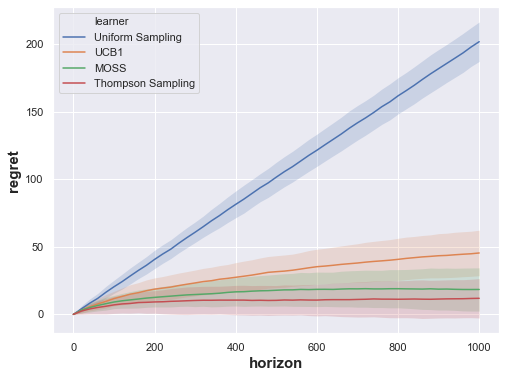

In [5]:
plt.figure(figsize=(8,6))
# add `save_fig=FILEPATH` in the arguments if you want to save the figure
df = banditpylib.plot(data)

In [6]:
print(tabulate(df.head(), headers=["policy", "regret"]))

policy          regret
------------  --------
('MOSS', 0)      0
('MOSS', 20)     3.165
('MOSS', 40)     5.04
('MOSS', 60)     6.58
('MOSS', 80)     7.92
